In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Mean Squared Error Loss function
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


In [5]:
# Feedforward Neural Network Class
class FeedforwardNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        # Initialize weights and biases
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        self.weights_input_hidden = np.random.uniform(-1, 1, (self.input_size, self.hidden_size))
        self.weights_hidden_output = np.random.uniform(-1, 1, (self.hidden_size, self.output_size))

        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.bias_output = np.zeros((1, self.output_size))

    def forward(self, X):
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = sigmoid(self.hidden_input)

        self.final_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.final_output = sigmoid(self.final_input)

        return self.final_output

    def backward(self, X, y, output):
        # Compute error
        error = y - output
        output_gradient = error * sigmoid_derivative(output)

        hidden_error = np.dot(output_gradient, self.weights_hidden_output.T)
        hidden_gradient = hidden_error * sigmoid_derivative(self.hidden_output)

        # Update weights and biases
        self.weights_hidden_output += np.dot(self.hidden_output.T, output_gradient) * self.learning_rate
        self.bias_output += np.sum(output_gradient, axis=0, keepdims=True) * self.learning_rate

        self.weights_input_hidden += np.dot(X.T, hidden_gradient) * self.learning_rate
        self.bias_hidden += np.sum(hidden_gradient, axis=0, keepdims=True) * self.learning_rate

    def train(self, X, y, epochs=1000):
        loss_history = []
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)
            loss = mse_loss(y, output)
            loss_history.append(loss)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.5f}")

        return loss_history


In [6]:
# Generating a simple dataset
np.random.seed(1)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # XOR input
y = np.array([[0], [1], [1], [0]])  # XOR output

# Model initialization
nn = FeedforwardNeuralNetwork(input_size=2, hidden_size=4, output_size=1, learning_rate=0.5)

# Train the neural network
loss_history = nn.train(X, y, epochs=10000)

Epoch 0, Loss: 0.24973
Epoch 100, Loss: 0.24782
Epoch 200, Loss: 0.24138
Epoch 300, Loss: 0.22216
Epoch 400, Loss: 0.19063
Epoch 500, Loss: 0.15656
Epoch 600, Loss: 0.11499
Epoch 700, Loss: 0.07240
Epoch 800, Loss: 0.04254
Epoch 900, Loss: 0.02598
Epoch 1000, Loss: 0.01722
Epoch 1100, Loss: 0.01232
Epoch 1200, Loss: 0.00935
Epoch 1300, Loss: 0.00742
Epoch 1400, Loss: 0.00609
Epoch 1500, Loss: 0.00513
Epoch 1600, Loss: 0.00441
Epoch 1700, Loss: 0.00386
Epoch 1800, Loss: 0.00342
Epoch 1900, Loss: 0.00306
Epoch 2000, Loss: 0.00277
Epoch 2100, Loss: 0.00252
Epoch 2200, Loss: 0.00231
Epoch 2300, Loss: 0.00213
Epoch 2400, Loss: 0.00198
Epoch 2500, Loss: 0.00185
Epoch 2600, Loss: 0.00173
Epoch 2700, Loss: 0.00162
Epoch 2800, Loss: 0.00153
Epoch 2900, Loss: 0.00145
Epoch 3000, Loss: 0.00137
Epoch 3100, Loss: 0.00130
Epoch 3200, Loss: 0.00124
Epoch 3300, Loss: 0.00118
Epoch 3400, Loss: 0.00113
Epoch 3500, Loss: 0.00108
Epoch 3600, Loss: 0.00104
Epoch 3700, Loss: 0.00100
Epoch 3800, Loss: 0.0009

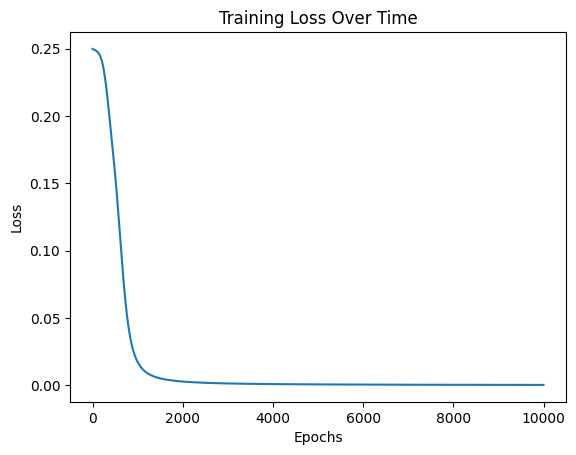

Input: [0 0], Predicted Output: [[0.]]
Input: [0 1], Predicted Output: [[1.]]
Input: [1 0], Predicted Output: [[1.]]
Input: [1 1], Predicted Output: [[0.]]


In [7]:
# Plot loss history
plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.show()

# Testing the model
for i in range(len(X)):
    output = nn.forward(X[i].reshape(1, -1))
    print(f"Input: {X[i]}, Predicted Output: {output.round()}")
